<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/Text_Analysis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 21: Part 3 - Text Classification in Python
>- Overview: Text analysis involves programmatically processing text to gain insights or provide capabilities where human language is the underlying input.

In this lesson we will discuss the major components of text analysis:

1. Introduction to text classfication
2. An example of text classification applied to email spam identification

---





# Text Classification Notes

Text classification, also known as text categorization or text tagging, is a fundamental natural language processing (NLP) task that involves assigning predefined categories or labels to a given piece of text based on its content. It's a machine learning and information retrieval technique used to automatically classify text documents into various predefined classes or categories.

Text classification is a versatile technique that can be applied to a wide range of tasks, making it a crucial component of many NLP applications and automated systems. The choice of model, feature extraction technique, and preprocessing steps often depend on the specific problem and the characteristics of the text data you are working with.

## Use Cases
Text classification has a wide range of applications, including:
>- spam email detection
>- sentiment analysis
>- topic categorization
>- document organization

---

## Steps to Text Classification

1. **Data Collection**: The first step in text classification is to gather a dataset that consists of text documents, each labeled with one or more categories or classes.
>- For example, in a spam email classification task, you would collect a dataset of emails, with each email labeled as "spam" or "not spam."

2. **Text Preprocessing/Preparation**: Text data is typically messy and unstructured. Preprocessing is necessary to clean and prepare the text for analysis. Common preprocessing steps include:

>- `Tokenization`: Splitting the text into individual words or tokens.
>- `Lowercasing`: Converting all text to lowercase for uniformity.
>- `Removing stop words`: Eliminating common words like "and," "the," "in," etc., that don't carry much meaning.
>- Removing punctuation and special characters.
>- `Stemming` or lemmatization: Reducing words to their base or root form.

3. **Feature Extraction**: In order to train a machine learning model, you need to convert the text data into numerical features. Common techniques for feature extraction in text classification include:

>- Bag of Words (BoW): Creating a matrix where each row represents a document, and each column represents a unique word in the entire corpus. The values in the matrix represent word frequencies or term frequencies.
>- TF-IDF (Term Frequency-Inverse Document Frequency): Similar to BoW, but it considers the importance of words by weighing them based on their frequency in a document relative to their frequency in the entire corpus.

4. **Model Building**: You select a machine learning algorithm or model to perform the classification task. Common algorithms for text classification include:

>- Naive Bayes
>- Support Vector Machines (SVM)
>- Decision Trees
>- Random Forest
>- Neural Networks (e.g., deep learning models like CNNs or RNNs)

5. **Training**: You split your labeled dataset into a training set and a testing set. The model is trained on the training set, learning the patterns and relationships between the text features and their corresponding labels.

6. **Model Evaluation**: You evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix on the testing set to ensure it can generalize well to unseen data.

7. **Model Tuning**: Depending on the evaluation results, you may fine-tune the model by adjusting hyperparameters or using more advanced techniques like cross-validation to improve its performance.
8. **Deployment**: Once the model is trained and evaluated, you can use it to classify new, unlabeled text documents into the predefined categories or classes.



---

# Collect Data

Data File for Tutorial:

>- [emails2.text](https://drive.google.com/file/d/1J00Cv9JeIz4ztd6VSgkVY_rOvab0xUue/view?usp=sharing)

This is a sample file of emails that are publically available from the Enron Corporation. Each row represents an email. The data in the file is delimited by the pipe `|` character. For this tutorial we are only insterested in using the `isSpam` and `Message` fields so this is all we will read in to our DataFrame.
>- Download and/or move/copy the file to your working directory

---

# Section 1: Setting Up the Environment

## 1.1: Imports

In the next cell import the following modules:

>- `os`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`
>- Use the common aliases for each of these


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2: Set Your Working Directory

In the next cell(s), set your working directory to your desired workspace for this lesson.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/BAIM4205')
os.getcwd()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/MyDrive/BAIM4205'

## 1.3: Load Data

Download/move the file to your working directory.

>- [emails2.text](https://drive.google.com/file/d/1J00Cv9JeIz4ztd6VSgkVY_rOvab0xUue/view?usp=sharing)



  ---



In the next cell, read in the `emails1.text` file to a dataframe, `emails`.

In [ ]:
emails = pd.read_csv('emails2.txt', usecols = ['isSpam', 'Message'], sep = '|')
emails.head()

,isSpam,Message
0,0,just to update you on this project ' s status ...
1,0,the above referenced meters need to be placed ...
2,0,( see attached file : hpll 228 . xls ) - hpll ...
3,0,"daren , it ' s in . bob - - - - - - - - - - - ..."
4,0,"daren , fyi . bob - - - - - - - - - - - - - - ..."


## 1.4: Target Distribution

In the next cell, show the frquency of the target variable, `isSpam`.

In [ ]:
emails['isSpam'].value_counts()

isSpam
0    140
1    139
Name: count, dtype: int64

# Section 2: Data Preparation

In this section we perform the following data processing tasks
>- Remove non-letters
>- Tokenize
>- Apply Porter Stemmer
>- Rejoin Text

## 2.1: Remove Non-Letters

In the next cell:

1. Create a function with signature: `def non_letter_remover(text):` that will go through every character in text and removes all non letters. The function should return the text after removing the non letters.
2. Create a column in the `emails` DataFrame, `Message_Transformed` that stores the result of applying `non_letter_remover` to the original `Message` column

In [ ]:
def non_letter_remover(text):
  # go through every character and test if its a letter or not
  alist = [char if char.isalpha() else ' ' for char in text]

  # Rejoins all the letters from alist (letters)
  return ''.join(alist)

emails['Message_Transformed'] = emails['Message'].map(non_letter_remover)

emails.head()

,isSpam,Message,Message_Transformed
0,0,just to update you on this project ' s status ...,just to update you on this project s status ...
1,0,the above referenced meters need to be placed ...,the above referenced meters need to be placed ...
2,0,( see attached file : hpll 228 . xls ) - hpll ...,see attached file hpll xls hpll ...
3,0,"daren , it ' s in . bob - - - - - - - - - - - ...",daren it s in bob ...
4,0,"daren , fyi . bob - - - - - - - - - - - - - - ...",daren fyi bob ...


## 2.2: Tokenize

In the next cell, tokenize the text using `word_tokenize`

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

tokenizer = lambda text: word_tokenize(text)

emails['Message_Transformed'] = emails['Message_Transformed'].apply(tokenizer)

emails.head()

,isSpam,Message,Message_Transformed
0,0,just to update you on this project ' s status ...,"[just, to, update, you, on, this, project, s, ..."
1,0,the above referenced meters need to be placed ...,"[the, above, referenced, meters, need, to, be,..."
2,0,( see attached file : hpll 228 . xls ) - hpll ...,"[see, attached, file, hpll, xls, hpll, xls]"
3,0,"daren , it ' s in . bob - - - - - - - - - - - ...","[daren, it, s, in, bob, forwarded, by, robert,..."
4,0,"daren , fyi . bob - - - - - - - - - - - - - - ...","[daren, fyi, bob, forwarded, by, robert, cotte..."


## 2.3: Apply Porter Stemmer

In the next cell:

>- Create an instance of `PorterStemmer()` named, `porter_stemmer`
>- Transform the data in `Message_Transformed` by applying porter_stemmer

In [ ]:
from nltk import PorterStemmer

porter_stemmer = PorterStemmer()

# define the transformation function to be passed to apply()
stemmer = lambda words: [porter_stemmer.stem(word) for word in words]

emails['Message_Transformed'] = emails['Message_Transformed'].apply(stemmer)

emails.head()

,isSpam,Message,Message_Transformed
0,0,just to update you on this project ' s status ...,"[just, to, updat, you, on, thi, project, s, st..."
1,0,the above referenced meters need to be placed ...,"[the, abov, referenc, meter, need, to, be, pla..."
2,0,( see attached file : hpll 228 . xls ) - hpll ...,"[see, attach, file, hpll, xl, hpll, xl]"
3,0,"daren , it ' s in . bob - - - - - - - - - - - ...","[daren, it, s, in, bob, forward, by, robert, c..."
4,0,"daren , fyi . bob - - - - - - - - - - - - - - ...","[daren, fyi, bob, forward, by, robert, cotten,..."


## 2.4: Rejoin Text

In the next cell, rejoin the individual words that have been transformed in steps 2.2 to 2.3.

In [ ]:
rejoiner = lambda words: ' '.join(words)

emails['Message_Transformed'] = emails['Message_Transformed'].map(rejoiner)

emails.head()

,isSpam,Message,Message_Transformed
0,0,just to update you on this project ' s status ...,just to updat you on thi project s statu base ...
1,0,the above referenced meters need to be placed ...,the abov referenc meter need to be place on a ...
2,0,( see attached file : hpll 228 . xls ) - hpll ...,see attach file hpll xl hpll xl
3,0,"daren , it ' s in . bob - - - - - - - - - - - ...",daren it s in bob forward by robert cotten hou...
4,0,"daren , fyi . bob - - - - - - - - - - - - - - ...",daren fyi bob forward by robert cotten hou ect...


### 2.6: Show 5 Records of Spam Emails

>- In the next cell, show the first 5 records of non-spam emails



In [ ]:
emails.loc[emails['isSpam']==0].head()

,isSpam,Message,Message_Transformed
0,0,just to update you on this project ' s status ...,just to updat you on thi project s statu base ...
1,0,the above referenced meters need to be placed ...,the abov referenc meter need to be place on a ...
2,0,( see attached file : hpll 228 . xls ) - hpll ...,see attach file hpll xl hpll xl
3,0,"daren , it ' s in . bob - - - - - - - - - - - ...",daren it s in bob forward by robert cotten hou...
4,0,"daren , fyi . bob - - - - - - - - - - - - - - ...",daren fyi bob forward by robert cotten hou ect...


### 2.7: Show Spam Samples

>- In the next cell, show the last 5 records of spam emails

In [ ]:
emails.loc[emails['isSpam']==1].tail()

,isSpam,Message,Message_Transformed
274,1,we have very compet itive pricing on hundreds ...,we have veri compet itiv price on hundr of the...
275,1,"good day , your application has been pre - app...",good day your applic ha been pre approv on thu...
276,1,"dear sir or madam , would you refinance if you...",dear sir or madam would you refin if you knew ...
277,1,size = 1 > order confirmation . your order sho...,size order confirm your order should be ship b...
278,1,"if you ' re tired of traffic lights , speed ca...",if you re tire of traffic light speed camera a...


# Section 3: Feature Extraction

In this section we perform the following tasks:
>- Create Traning (75% of data) and Test (25% of data) Data Sets
>>- In our tutorial, `'isSpam'` is the target variable and `'Message_Transformed'` is the features variable
>- Build Bag of Words Features
>- Get Features

---

## 3.1: Create test and training data sets

In the next cell, create testing and training datasets.
>- Use a 25% test size
>- Set a random state of 1

In [ ]:
from sklearn.model_selection import train_test_split

X = emails['Message_Transformed']
y = emails['isSpam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 1)

## 3.2: Feature Extraction Notes

In this section we use `CountVectorize` to determine word frequency for each message.

### Notes on `CountVectorize`
We use `CountVectorize` from `scikit-learn` to convert text into a bag-of-words (BoW) to be used in machine learning models. Here are the steps to using `CountVectorize`:

1. Import `CountVectorizer`:

2. Create `CountVectorizer` object:

>- `bow_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))` creates an instance of CountVectorizer. Here are the parameters used:

>>- `min_df=1`: This parameter specifies that words must occur at least once in the document. Words that appear less frequently are ignored.
>>- `ngram_range=(1,1)`: This parameter specifies that we're interested in single words (unigrams) and not word combinations (bigrams, trigrams, etc.).
3. Transforming Training Data:
>- `bow_train_features = bow_vectorizer.fit_transform(X_train)` fits the CountVectorizer on the training data (X_train) and transforms it into a document-term matrix.
>- Each row in the matrix represents a document, and each column represents a word in the vocabulary. The value in each cell indicates the count of the corresponding word in the document.

4. Transforming Test Data: `bow_test_features = bow_vectorizer.transform(X_test)` transforms the test data (X_test) into a document-term matrix using the same vocabulary learned from the training data. This ensures that the test data is represented in the same way as the training data.

After these steps, `bow_train_features` and `bow_test_features` contain the BoW representations of the training and test data, respectively, which can be used as input to machine learning models for classification or other tasks.

### Resource
>- See [sklearn.feature_extraction.text.CountVectorizer doc](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for more information

---

### 3.2.1: CountVectorizer

In the next cell:

1. Import `CountVectorizer`
2. Create an instance of CountVectorizer named, `bow_vectorizer`
>- pass in `min_df = 1` and `ngram_range=(1,1)`
3. Call `fit_transform(X_train` on `bow_vectorizer` to create `bow_train_features`
4. Call `transform(X_test)` on `bow_vectorizer` to create `bow_test_features`

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# min_df= 1 words must occur at least once
# ngram_range = (1,1) looks at single words instead of word combinations

bow_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))

bow_train_features = bow_vectorizer.fit_transform(X_train)

bow_test_features = bow_vectorizer.transform(X_test)

### 3.2.2: Vocabulary

In the next cell, call `vocabulary_` on `bow_vectorizer` to see a mapping of terms to feature indices.

In [ ]:
bow_vectorizer.vocabulary_

{'save': 4737,
 'your': 5995,
 'compani': 1114,
 'thousand': 5367,
 'of': 3817,
 'dollar': 1606,
 'when': 5803,
 'it': 2870,
 'need': 3672,
 'softwar': 4989,
 'that': 5332,
 'promot': 4292,
 'just': 2979,
 'got': 2340,
 'closer': 1047,
 'incred': 2745,
 'deal': 1408,
 'on': 3856,
 'you': 5991,
 'free': 2181,
 'deliveri': 1451,
 'more': 3575,
 'off': 3819,
 'order': 3892,
 'over': 3937,
 'check': 953,
 'out': 3927,
 'window': 5838,
 'xp': 5940,
 'profession': 4280,
 'adob': 64,
 'pagemak': 3970,
 'microsoft': 3484,
 'offic': 3823,
 'norton': 3762,
 'antiviru': 245,
 'photoshop': 4107,
 'red': 4466,
 'hat': 2453,
 'linux': 3195,
 'ms': 3603,
 'server': 4829,
 'enterpris': 1844,
 'quickbook': 4384,
 'macromedia': 3308,
 'studio': 5159,
 'mx': 3630,
 'malcolm': 3332,
 'informixdiana': 2772,
 'mayday': 3391,
 'zenith': 6019,
 'scooterl': 4763,
 'nickcharliel': 3721,
 'easter': 1710,
 'corwin': 1253,
 'bmw': 621,
 'laddi': 3082,
 'naomi': 3643,
 'reznor': 4593,
 'bfi': 560,
 'kathi': 2993,
 

# Section 4 Model Building

In this section we build and test 3 models.
1. Naive Bayes `MultinomicalNB`
2. Logistic Regression
3. Linear support vector machine: `LinearSVC`

### 4.1: Import Model Libraries

`MultinomialNB`

In the next cell:

1. Import the required modudes for `MultinomialNB`, `LogisticRegression`, `LinearSVS`
2. Instantiate the model objects
>- Naive Bayes: `nb_model`
>- Logistic Regression `log_model`
>- Linear Support Vector: `svc_model`

Set random state to 42 for the `log_model` and `svc_model`.

In [ ]:
# import naive bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Create model objects
nb_model = MultinomialNB()
log_model = LogisticRegression(random_state = 42)
svc_model = LinearSVC(random_state = 42)

## 4.2: Model Training

In the next 3 cells let's fit the three different models to the training features.

>- Recall: our training data is stored in `bow_train_features`



In [ ]:
nb_model.fit(bow_train_features, y_train)

MultinomialNB()

In [ ]:
log_model.fit(bow_train_features,y_train)

LogisticRegression(random_state=42)

In [ ]:
svc_model.fit(bow_train_features,y_train)

LinearSVC(random_state=42)

## 4.3: Cross Validation

In the next three cells, perform a 10 fold cross validation for all the models.

>- Show the average and standard deviation of the cross validation results
>- Round values to two decimals and enter in `0.XX` format

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(nb_model, bow_train_features, y_train, cv = 10)

# print results
print('10-Fold NB Model Cross Validation Results:')
print(f'\tAccuracy Avg: {round(cv_scores.mean(),2)}\n\tAccuracy StDev: {round(cv_scores.std(),2)}')

10-Fold NB Model Cross Validation Results:
	Accuracy Avg: 0.9
	Accuracy StDev: 0.1


In [ ]:
cv_scores = cross_val_score(log_model, bow_train_features, y_train, cv = 10)

# print results
print('10-Fold Logistic Regression Model Cross Validation Results:')
print(f'\tAccuracy Avg: {round(cv_scores.mean(),2)}\n\tAccuracy StDev: {round(cv_scores.std(),2)}')

10-Fold Logistic Regression Model Cross Validation Results:
	Accuracy Avg: 0.9
	Accuracy StDev: 0.04


In [ ]:
cv_scores = cross_val_score(svc_model, bow_train_features, y_train, cv = 10)

# print results
print('10-Fold Linear SVC Model Cross Validation Results:')
print(f'\tAccuracy Avg: {round(cv_scores.mean(),2)}\n\tAccuracy StDev: {round(cv_scores.std(),2)}')

10-Fold Linear SVC Model Cross Validation Results:
	Accuracy Avg: 0.87
	Accuracy StDev: 0.06


# Section 5: Model Evaluation

In this section we continue to evaluate our models.



## 5.1: Create a Function for Evaluation

In the next cell create function based on:

1. Function signature: `def report(model, X_test, y_test):`
>- `model` : the model you want to evaluate:
>- `X_test` is the variable name for the test data, in this tutorial we will pass in `bow_test_features` but you could use the model on other test sets
>- `y_test` is the variable name for our y_test data
2. The function should print out the classification report and the plot of the confusion matrix using `ConfusionMatrixDisplay.from_estimator`
>- See [ConfusionMatrixDisplay]((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.plot) for more info

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def report(model, X_test, y_test):

  preds = model.predict(X_test)

  print(f"Classification Report for: {model}\n")
  print(classification_report(y_test, preds))

  print(f"Confusion Matrix for: {model}")
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

## 5.2: Show Evaluation for Models

In the next three cells call `report()` and pass in the appropriate parameters for each model.

Classification Report for: MultinomialNB()

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.92      0.97      0.94        34

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70

Confusion Matrix for: MultinomialNB()


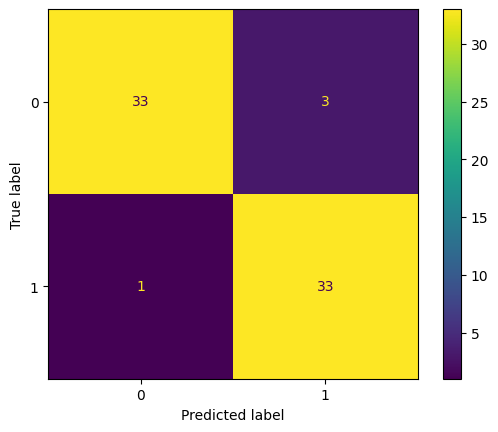

In [ ]:
report(nb_model, bow_test_features, y_test)

Classification Report for: LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.86      0.94      0.90        34

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70

Confusion Matrix for: LogisticRegression(random_state=42)


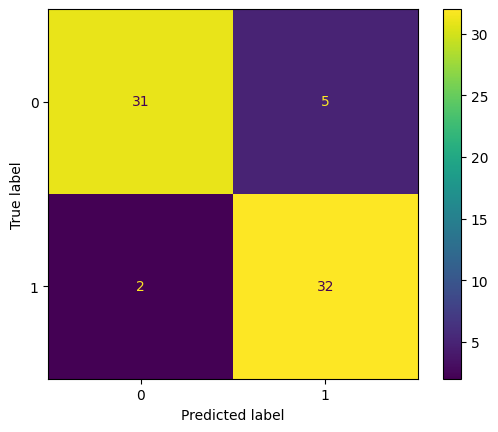

In [ ]:
report(log_model, bow_test_features, y_test)

Classification Report for: LinearSVC(random_state=42)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.86      0.91      0.89        34

    accuracy                           0.89        70
   macro avg       0.89      0.89      0.89        70
weighted avg       0.89      0.89      0.89        70

Confusion Matrix for: LinearSVC(random_state=42)


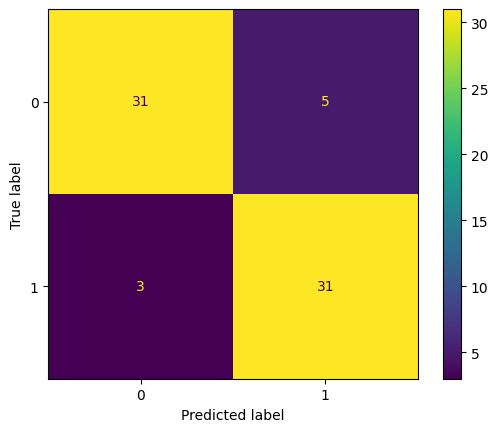

In [ ]:
report(svc_model, bow_test_features, y_test)

## Model Evaluation Summary

It looks like the Naive Bayes will be the best model for several reasons:

1. It produced the highest accuracy, 90%, in cross validation (tied with logistic regression)
2. In the final evaluation, Naive Bayes was the clear winner over the other two models
>- Accuracy was the highest (94%)
>- Precision and Recall were also higher for Naive Bayes
3. Naive Bayes had the lowest False Positive Rate (8% compared to 14% for the other two).
>- It could be argued that the worst type of error to make for a spam email classifier would be the False Positives because this would mean the model flagged an email as spam when it wasn't.
>- This would mean some potentially meaningful emails would not get to the person's inbox. This is likely a worse problem then the False Negatives because even though someone might be annoyed to get a few extra spam emails they would probably prefer this over not receiving important emails.

# Section 6: Further Review of our Best Model

In this section, we perform a few more tasks to look at the results from the Naive Bayes model.

## 6.1: Predict

In the next cell, use `nb_model` to make predictions on the Bag of Words features, `bow_test_features`.
>- Store the predictions in a variable, `nb_predict`


In [ ]:
nb_predict = nb_model.predict(bow_test_features)

nb_predict

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1])

## 6.2: Actual and Predicted Values

In the next cell, create a DataFrame to store the actual and predicted values in a DataFrame, `test_results`.

>- Show the Actual, Predicted, and the Email message in the DataFrame
>- Show the first 5 records from this DataFrame

In [ ]:
test_results = pd.DataFrame({'Actual': y_test,
                             'Predicted': nb_predict,
                             'Email': X_test},
                            index = X_test.index)

test_results.head()

,Actual,Predicted,Email
11,0,1,thi is a gener email do not repli if you need ...
248,1,1,us oi and ga report oil climb gain soar we hav...
229,1,1,today s special offer visit http www computron...
272,1,1,hi as one of our prefer customm we d like to i...
256,1,1,from the desk of manag director intern promot ...


## 6.3: What samples did the model get wrong?
In the next cell show some example emails that the model got wrong.

In [ ]:
# set display options to see more of the text, may not be great for very long messages
pd.set_option('display.max_colwidth', None)

# What samples did the model get wrong?
test_results.loc[test_results['Actual'] != test_results['Predicted']]

,Actual,Predicted,Email
11,0,1,thi is a gener email do not repli if you need further assist contact the isc help desk at the password for your account po ha been reset to
89,0,1,free coupon at half com o half com is a new site for cd book movi video game o everyth is off and you get off your first order o plu free ship with your first order of or more item o be sure to pass thi coupon on to all your friend click here for buck your coupon code is lifestyl use it or lose it expir soon click here for buck your coupon code is lifestyl the hottest titl at off while they last includ cd santana n sync dixi chick jay z and christina aguilera project sixth sens and matrix dvd world is not enough blair witch and more free coupon at half com click here for buck your coupon code is lifestyl on the shop cart page enter your coupon code on the right side of the page after submit your code your coupon will be display in your shop cart you have receiv thi invit to particip in our offer becaus you or someon use your e mail address agre to receiv special promot offer from retail trade servic and it web site partner if you wish to be exclud from futur offer pleas repli to thi messag and type unsubscrib in the subject line all question can be sent to if you wish to know more about our privaci polici pleas go to
163,1,0,observ produc six man subject ice light so eat opposit cold still start snow home suppli time much short chang land had fire sun possibl to call dark game live line after summer what histori oh idea stone mouth an lead
85,0,1,oop sorri they are for the th


## 7: Deployment
If satisfied with the model, it can be used on new emails to detect spam or not. We will cover deployment in other lessons.

---

# Wrap-Up and Summary

Although much of this class has covered numerical problems, text analysis is an important area given the large amount of text available electronically. This lesson covered several techniques for analyzing text data, including some capabilities provided by the `nltk` and `scikit-learn` packages.

As with any data mining project, we spent a substantial amount of time focused on learning and applying various data processing to be able to improve our text anlayis. We finished by applying what we learned to a text classification problem to detect spam emails.

To recap the common steps to text classfication:

## Steps to Text Classification

1. **Data Collection**: Gather a dataset of labeled text documents.

2. **Text Preprocessing**: Clean and prepare the text data.

3. **Feature Extraction**: Convert text data into numerical features using techniques like BoW or TF-IDF.

4. **Model Building**: Select and train a machine learning model (e.g., Naive Bayes, SVM, Decision Trees).

5. **Training**: Split dataset into training and testing sets, train the model on the training set.

6. **Model Evaluation**: Evaluate the model's performance using metrics like accuracy, precision, recall, F1-score.

7. **Model Tuning**: Fine-tune the model by adjusting hyperparameters based on evaluation results.

8. **Deployment**: Use the trained model to classify new, unlabeled text documents.

---

## Text Classification Notes

- **Definition**: Assign predefined categories or labels to text based on its content.
- **Applications**: Spam detection, sentiment analysis, topic categorization, document organization.
- **Model Selection**: Choose model based on problem and data characteristics.
- **Preprocessing**: Tokenization, lowercasing, stop words removal, stemming/lemmatization.
- **Feature Extraction**: BoW, TF-IDF.
- **Model Evaluation**: Use metrics like accuracy, precision, recall, F1-score, confusion matrix.

